In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import KMeans

# Get the current working directory
current_dir = os.getcwd()


In [2]:

# Append the parent directory
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from scripts.utils import *
from scripts.data_visualization import *
# ignore warrnings
import warnings
warnings.filterwarnings("ignore")
from db.dbConnections import PostgresConnection

In [3]:
db=PostgresConnection()
db.connect()

query='select * from xdr_data'
db.execute_query(query)


Connected to PostgreSQL database
Query executed successfully


In [4]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# get summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046091e+08,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103761e+07,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142988e+06,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744079e+07,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639998e+07,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324308e+08,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+09,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [7]:
# Identify missing value percentages
df.isnull().mean()*100

Bearer Id                                     0.660662
Start                                         0.000667
Start ms                                      0.000667
End                                           0.000667
End ms                                        0.000667
Dur. (ms)                                     0.000667
IMSI                                          0.379997
MSISDN/Number                                 0.710662
IMEI                                          0.381331
Last Location Name                            0.768662
Avg RTT DL (ms)                              18.552543
Avg RTT UL (ms)                              18.541210
Avg Bearer TP DL (kbps)                       0.000667
Avg Bearer TP UL (kbps)                       0.000667
TCP DL Retrans. Vol (Bytes)                  58.763608
TCP UL Retrans. Vol (Bytes)                  64.432237
DL TP < 50 Kbps (%)                           0.502663
50 Kbps < DL TP < 250 Kbps (%)                0.502663
250 Kbps <

In [8]:
df.columns.values

array(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)',
       'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37

In [9]:
# Remove irrelevant columns
columns_to_drop = ['Start','End','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with 37500B < Vol UL','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 125000B < Vol DL','TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']  
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [10]:
print("Check remaining columns and data types")
df.info()
print("Preview the dataset")
df.head()


Check remaining columns and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Bearer Id                               149010 non-null  float64
 1   Start ms                                150000 non-null  float64
 2   End ms                                  150000 non-null  float64
 3   Dur. (ms)                               150000 non-null  float64
 4   IMSI                                    149431 non-null  float64
 5   MSISDN/Number                           148935 non-null  float64
 6   IMEI                                    149429 non-null  float64
 7   Last Location Name                      148848 non-null  object 
 8   Avg RTT DL (ms)                         122172 non-null  float64
 9   Avg RTT UL (ms)                         122189 non-null  float64
 10  Avg B

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,770.0,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,235.0,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,1.0,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,486.0,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,565.0,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [11]:
# see the difference between 'Dur. (ms)' and 'Dur. (ms).1'
print(df[['Dur. (ms)', 'Dur. (ms).1']].head(15))


       Dur. (ms) Dur. (ms).1
0   1.823653e+09        None
1   1.365104e+09        None
2   1.361763e+09        None
3   1.321510e+09        None
4   1.089009e+09        None
5   1.074638e+09        None
6   1.035262e+09        None
7   9.512929e+08        None
8   9.416348e+08        None
9   8.644823e+08        None
10  8.486377e+08        None
11  8.898349e+08        None
12  8.507661e+08        None
13  8.125077e+08        None
14  7.778874e+08        None


In [12]:
# hence the two columns are the same, we can drop one of them
df.drop(columns='Dur. (ms).1', inplace=True, errors='ignore')

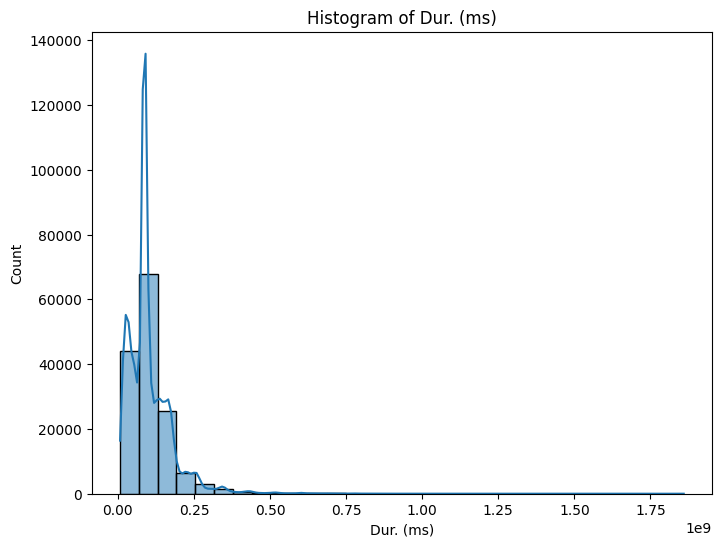

In [13]:

# Univariate Analysis
univariate_analysis(df, 'Dur. (ms)', plot_type='hist')
# univariate_analysis(df, 'Total Data (Bytes)', plot_type='box')

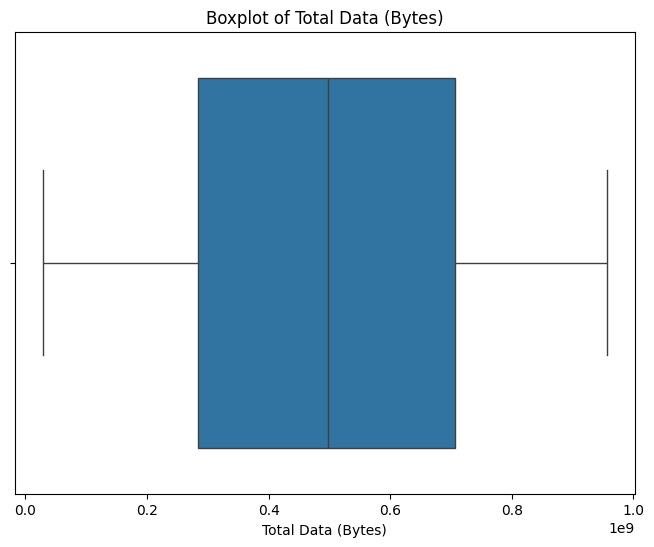

In [14]:
# combine 'Total UL (Bytes)' and 'Total DL (Bytes)'
df['Total Data (Bytes)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
# then run the univarient analysis
univariate_analysis(df, 'Total Data (Bytes)', plot_type='box')


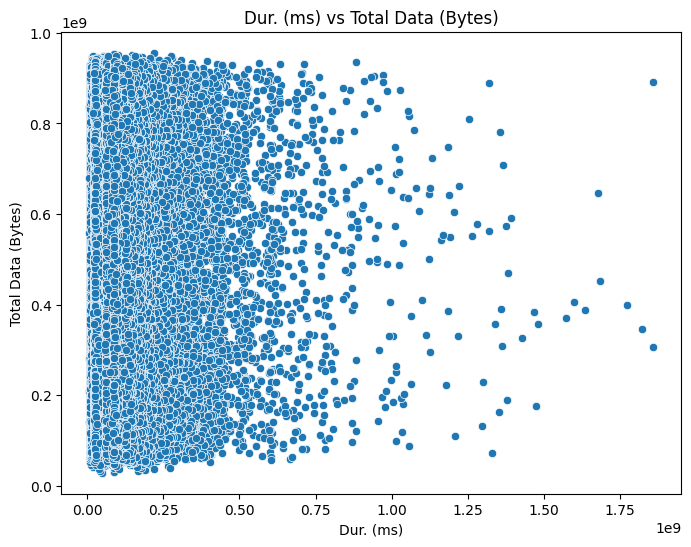

In [15]:
# bivariant analysis
bivariate_analysis(df, 'Dur. (ms)', 'Total Data (Bytes)', plot_type='scatter')


In [16]:
top_10_handsets(df)

Top 10 handsets:


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [17]:
print('undefined' in df['Handset Type'].unique())  # Verify if 'undefined' is a string or other value


True


In [18]:
# Count rows where both Handset Manufacturer and Handset Type are 'undefined'
undefined_rows = df[(df['Handset Manufacturer'] == 'undefined') & (df['Handset Type'] == 'undefined')]

# Get the number of such rows
num_undefined_rows = undefined_rows.shape[0]

print(f"Number of rows with both 'Handset Manufacturer' and 'Handset Type' as 'undefined': {num_undefined_rows}")


Number of rows with both 'Handset Manufacturer' and 'Handset Type' as 'undefined': 8987


In [19]:
# handling undefined manfucturer

# Step 1: Identify rows where 'Handset Type' is undefined
undefined_handsets = df[df['Handset Type'] == 'undefined'] 

# Step 2: Check for manufacturers in undefined rows
undefined_with_manufacturer = undefined_handsets[undefined_handsets['Handset Manufacturer'].notna()]

print(f"Undefined handsets with valid manufacturer: {len(undefined_with_manufacturer)}")

# Step 3: Most common handset type per manufacturer
common_types = df[df['Handset Type'] != 'undefined'].groupby('Handset Manufacturer')['Handset Type'].agg(lambda x: x.value_counts().idxmax())
print("common_types=",common_types)


# Step 4: Replace undefined handset types if manufacturer is valid and mapped
def replace_undefined(row):
    # Skip rows where the manufacturer is 'undefined'
    if row['Handset Type'] == 'undefined' and row['Handset Manufacturer'] != 'undefined':
        manufacturer = row['Handset Manufacturer']
        if manufacturer in common_types:
            return common_types[manufacturer]
    return row['Handset Type']


df['Handset Type'] = df.apply( replace_undefined, axis=1)

# Step 5: Recheck the count of undefined types
undefined_count = df[df['Handset Type'] == 'undefined'].shape[0]
print(f"Remaining undefined handset types: {undefined_count}")


Undefined handsets with valid manufacturer: 8987
common_types= Handset Manufacturer
A-Link Telecom International Co Limited    A-Link Telecom I. Cubot X18 Plus
ASUSTeK                                     Asustek Asus Zb552Kl Zenfone Go
Acer                                                              Acer M310
Adar                                               Adar Stanley Mobile S231
Alif Communications                           Alif Communicati. Pulian Cm84
                                                         ...               
ZTE                                                               Zte A2016
Zebra Technologies Corp.                    Zebra Technologi. Symbol Tc55Bh
Zte                                                               Zte Mf259
ZyXEL Communications Corp                   Zyxel Communicat. Zyxel Wah7706
Zyxel Communications Corp                         Zyxel Communicat. Lte7460
Name: Handset Type, Length: 169, dtype: object
Remaining undefined handset types

In [20]:
# verify filled result 
top_10_handsets = top_10_handsets(df)

Top 10 handsets:


In [21]:
top_3_manufacturers= top_3_manufacturers(df)

In [22]:
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer(df,top_manufacturers=top_3_manufacturers)

In [23]:
interpret_and_recommend(top_10_handsets,top_3_manufacturers,top_5_handsets_per_manufacturer)

["Top 10 handsets indicate customer preferences for ['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)', 'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'].",
 "Top 3 manufacturers dominate the market: ['Apple', 'Samsung', 'Huawei'].",
 'Key handsets driving engagement per manufacturer are:',
 "- Apple: ['Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)']",
 "- Samsung: ['Samsung Galaxy S8 (Sm-G950F)', 'Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)', 'Samsung Galaxy J3 (Sm-J330)', 'Samsung Galaxy S7 (Sm-G930X)']",
 "- Huawei: ['Huawei B528S-23A', 'Huawei E5180', 'Huawei P20 Lite Huawei Nova 3E', 'Huawei P20', 'Huawei Y6 2018']",
 'Recommendations:',
 '- Target marketing campaigns towards customers using popular handsets.',
 '- Partner with top manufac